In [ ]:
#IMPORTACIÓN DE LIBRERÍAS

import numpy   as np
import pandas  as pd
import seaborn as sns
import missingno as msno
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from google.colab import drive

import warnings
warnings.filterwarnings("ignore")

# 1. Importación de los datos

In [ ]:
data = pd.read_csv("/content/pokemon2.csv")

pd.set_option('display.max_row',data.shape[0])
pd.set_option('display.max_column',data.shape[1])
data.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


##ESTADÍSTICAS DESCRIPTIVAS PRELIMINARES

In [ ]:
data.shape #801, 41

(801, 41)

In [ ]:
data.tail()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
796,['Beast Boost'],0.25,1.0,0.5,2.0,0.5,1.0,2.0,0.5,1.0,0.25,0.0,1.0,0.5,0.0,0.5,1.0,0.5,1.0,101,30720,0,570,25,Launch Pokémon,103,1250000,9.2,97,Tekkaguyaテッカグヤ,Celesteela,NaN,797,107,101,61,steel,flying,999.9,7,1
797,['Beast Boost'],1.00,1.0,0.5,0.5,0.5,2.0,4.0,1.0,1.0,0.25,1.0,1.0,0.5,0.0,0.5,0.5,0.5,0.5,181,30720,0,570,255,Drawn Sword Pokémon,131,1250000,0.3,59,Kamiturugiカミツルギ,Kartana,NaN,798,59,31,109,grass,steel,0.1,7,1
798,['Beast Boost'],2.00,0.5,2.0,0.5,4.0,2.0,0.5,1.0,0.5,0.50,1.0,2.0,1.0,1.0,0.0,1.0,1.0,0.5,101,30720,0,570,15,Junkivore Pokémon,53,1250000,5.5,223,Akuzikingアクジキング,Guzzlord,NaN,799,97,53,43,dark,dragon,888.0,7,1
799,['Prism Armor'],2.00,2.0,1.0,1.0,1.0,0.5,1.0,1.0,2.0,1.00,1.0,1.0,1.0,1.0,0.5,1.0,1.0,1.0,107,30720,0,600,3,Prism Pokémon,101,1250000,2.4,97,Necrozmaネクロズマ,Necrozma,NaN,800,127,89,79,psychic,NaN,230.0,7,1
800,['Soul-Heart'],0.25,0.5,0.0,1.0,0.5,1.0,2.0,0.5,1.0,0.50,2.0,0.5,0.5,0.0,0.5,0.5,1.0,1.0,95,30720,0,600,3,Artificial Pokémon,115,1250000,1.0,80,Magearnaマギアナ,Magearna,NaN,801,130,115,65,steel,fairy,80.5,7,1


In [ ]:
data.sample(5).T

,53,757,640,248,750
abilities,"['Damp', 'Cloud Nine', 'Swift Swim']","['Corrosion', 'Oblivious']","['Prankster', 'Defiant', 'Regenerator']","['Pressure', 'Multiscale']","['Water Bubble', 'Water Absorb']"
against_bug,1.0,0.25,0.5,1.0,1.0
against_dark,1.0,1.0,1.0,2.0,1.0
against_dragon,1.0,1.0,1.0,1.0,1.0
against_electric,2.0,1.0,2.0,2.0,2.0
against_fairy,1.0,0.25,1.0,1.0,1.0
against_fight,1.0,0.5,0.5,0.25,0.5
against_fire,0.5,0.5,1.0,1.0,1.0
against_flying,1.0,1.0,1.0,1.0,2.0
against_ghost,1.0,1.0,1.0,2.0,1.0


# 2. Limpieza de los datos.


## 2.1 Eliminación de los datos

En esta sección, se eliminan los datos que no se utilizarán o no son útiles para el enfoque del presente proyecto.

Estas columnas son las siguientes:

* percentage_male
* abilities

NOTA: Esta es la información del Dataframe general. No obstante, más a delante se generarán Datamarts que incluyan únicamente los factores necesarios para el análisis particular de cada pregunta.

In [ ]:
df = data.drop(labels=["percentage_male", "abilities"], axis=1) #Eliminamos las columnas


Se comprueba que sí se realizó la correcta eliminación de las columnas

In [ ]:
df.shape #801, 39. Se puede observar que disminuyeron la cantidad de columnas respecto al inicio del presente documento (41 vs. 39)
df.head() #En la tabla inferior, se observan que ya no existen las columnas mencionadas.

,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,1,65,65,45,grass,poison,6.9,1,0
1,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,2,80,80,60,grass,poison,13.0,1,0
2,1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,3,122,120,80,grass,poison,100.0,1,0
3,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,4,60,50,65,fire,NaN,8.5,1,0
4,0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,5,80,65,80,fire,NaN,19.0,1,0


## 2.2 Valores faltantes o null:

En esta sección se busca responder los siguientes puntos:

*   Existencia de valores null
*   Visualización de los datos null
*   Normalización de los datos null



### 2.2.1 Existencia de valores null

In [ ]:
df.isnull().values.any()

True

Existen valores null o faltantes en el dataframe. Se crea una lista con dichos valores.

In [ ]:
cols_missing_val = df.columns[df.isnull().any()].tolist()
print(cols_missing_val)

['height_m', 'type2', 'weight_kg']


Hay 3 columnas con valores faltantes.

Se obtiene el recuento exacto de cada una de las columnas que faltan:

In [ ]:
for col in cols_missing_val:
    print("%s : %d" % (col, df[col].isnull().sum()))

height_m : 20
type2 : 384
weight_kg : 20


### 2.2.2 Visualización de Datos faltantes

**DIAGRAMA DE BARRAS**

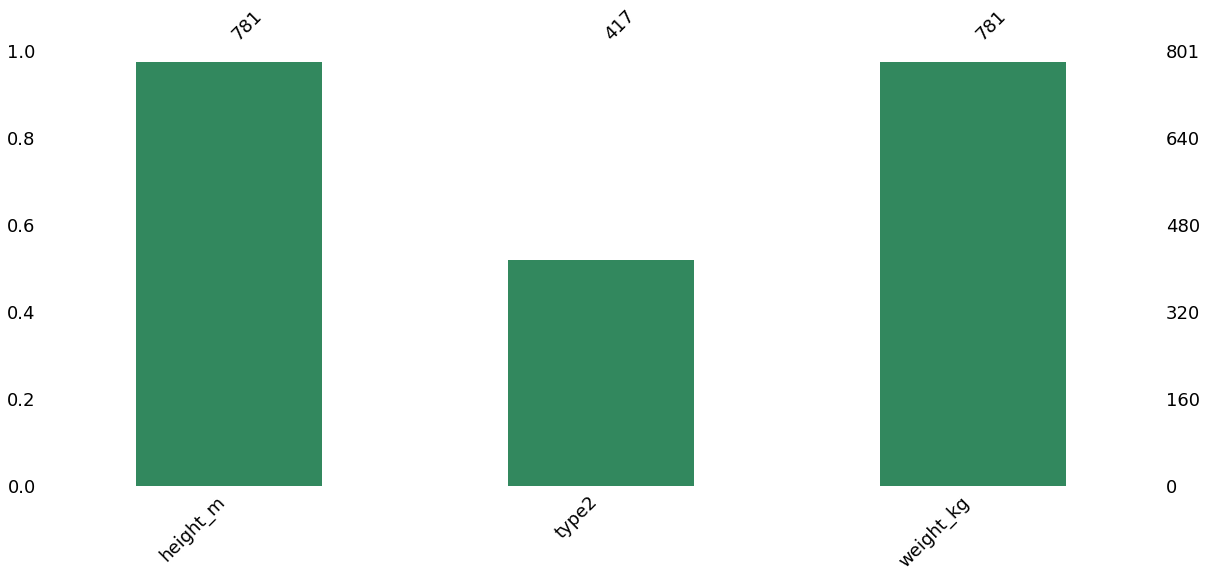

In [ ]:
msno.bar(df[cols_missing_val],figsize=(20,8),color="#32885e",fontsize=18,labels=True,)

**MATRIZ DE NULIDAD**





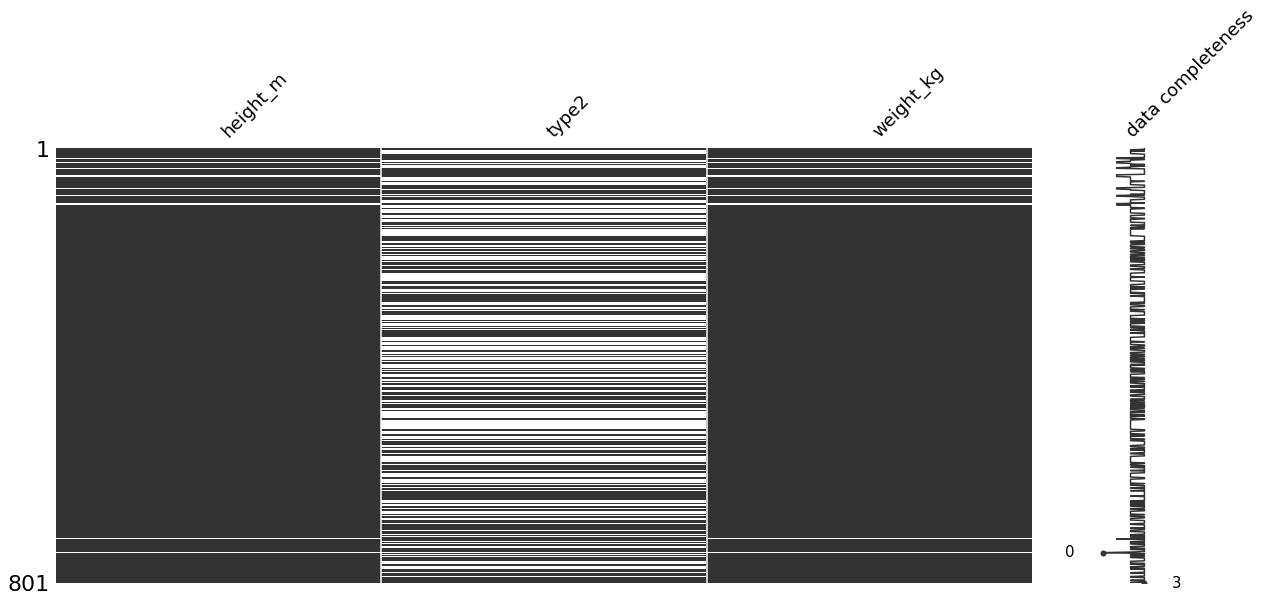

In [ ]:
msno.matrix(df[cols_missing_val],width_ratios=(10,1),\
            figsize=(20,8),color=(0.2,0.2,0.2),fontsize=18,sparkline=True,labels=True)

**DIAGRAMA DE CALOR**

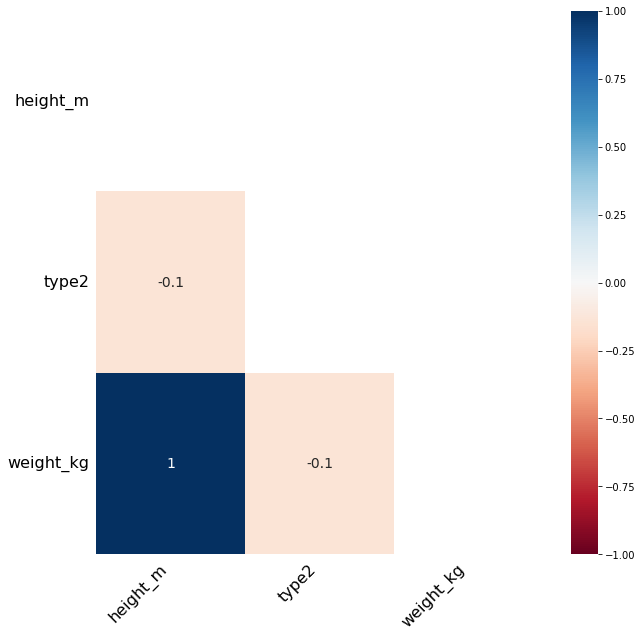

In [ ]:
msno.heatmap(df[cols_missing_val],figsize=(10,10))

Explicsción del gráfico

### 2.2.3 Normalización de datos null

En el punto 2.2.2 se observó que las columnas que cotenían datos null son:

* height_m
* type_2
* weight_kg



Para normalizar los valores null en cada columna, también se deben ver los otros valores.

> Indented block



El siguiente fragmento muestra la cantidad de valores únicos en cada una de las columnas que tienen valores faltantes:


In [ ]:
for col in cols_missing_val:
    print("%s : %d" % (col,df[col].nunique()))

height_m : 51
type2 : 18
weight_kg : 421


**type2**

Se pueden observar los objetos del tipo String presentes en la columna

In [ ]:
df['type2'].unique()

array(['poison', nan, 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

Se asignan los valores faltantes con algun String que no esté presente en esta lista (en este caso, se reemplazan los null por "HHH"):

In [ ]:
df['type2'].fillna('HHH', inplace=True)
df['type2'].unique()

array(['poison', 'HHH', 'flying', 'dark', 'electric', 'ice', 'ground',
       'fairy', 'grass', 'fighting', 'psychic', 'steel', 'fire', 'rock',
       'water', 'dragon', 'ghost', 'bug', 'normal'], dtype=object)

**height_m y weight_kg**

En este caso, se realiza una búsqueda en otros dataset para realizar la corrección del dato. Para esto, se utiliza el siguiente dataset: https://www.kaggle.com/datasets/mariotormo/complete-pokemon-dataset-updated-090420

Importamos el dataset y eliminamos los datos no necesarios

In [ ]:
datahelper = pd.read_csv("/content/All_Pokemon.csv")

#LIMPIAMOS EL DATASET
dfhelper = datahelper.filter(items=["Height", "Weight", "Number", "Name"])


#VERIFICAMOS QUE EL DATAFRAME NO TENGA DATOS NULL
print(dfhelper.isnull().any()) #False: No hay datos vacíos

dfhelper.head()


Height    False
Weight    False
Number    False
Name      False
dtype: bool


,Height,Weight,Number,Name
0,0.7,6.9,1,Bulbasaur
1,1.0,13.0,2,Ivysaur
2,2.0,100.0,3,Venusaur
3,2.4,155.5,3,Mega Venusaur
4,0.6,8.5,4,Charmander


Buscamos cuales son los registros (en el dataframe inicial) que tienen datos null en el peso y la altura

In [ ]:
dfnull  = df[df.isnull().any(axis=1)]
dfnull = dfnull.filter(items=["height_m", "weight_kg", "pokedex_number"])
dfnull.head()


,height_m,weight_kg,pokedex_number
18,NaN,NaN,19
19,NaN,NaN,20
25,NaN,NaN,26
26,NaN,NaN,27
27,NaN,NaN,28


Afortunadamente, el Number (del dataframe ayudante) y el pokedex_number del dataframe inicial son los mismos. Además, se puede observar que todos los datos null tienen ambos campos vacíos.

Se prosigue llenando los datos vacíos

In [ ]:
dfnull.dtypes

height_m          float64
weight_kg         float64
pokedex_number      int64
dtype: object

In [ ]:

def duplicate_delete(df, subset):
  return df.drop_duplicates(subset=subset, keep='first', inplace=False, ignore_index=False)


In [ ]:

pokedex_null_number = (dfnull.filter(items=["pokedex_number"]).values).tolist()
pokedex_null = []

for i in range (len(pokedex_null_number)):
  pokedex_null.append(pokedex_null_number[i][0])

dfnull = pd.DataFrame(dfnull, columns = ['height_m', 'weight_kg', 'pokedex_number']).reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')
dfnull = dfnull.drop(labels=['index'], axis=1)
dfhelper = duplicate_delete(dfhelper, 'Number').reset_index(level=None, drop=False, inplace=False, col_level=0, col_fill='')

for i in range (len(dfnull["height_m"])):
  if dfnull["pokedex_number"][i] in pokedex_null:
    val = int(dfnull["pokedex_number"][i])
    dfnull['height_m'][i] = dfhelper['Height'][val]
    dfnull['weight_kg'][i] = dfhelper['Weight'][val]

for value in pokedex_null:
  rowDf = df['pokedex_number'].tolist().index(value)
  rowDfNull = dfnull['pokedex_number'].tolist().index(value)
  df['height_m'][rowDf] = dfnull['height_m'][rowDfNull]
  df['weight_kg'][rowDf] = dfnull['weight_kg'][rowDfNull]
#Nulos
df.isnull().values.any()



False

In [ ]:
df.to_csv('/content/dataframe.csv',sep=',',index=False)